# WeatherPy: A Spatial Analysis of Global Temperature Trends With Python API calls and Matplotlib Visualizations
----

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from citipy import citipy
import random
import requests
import json
from datetime import datetime
from pprint import pprint
import scipy.stats as sts

# OpenWeatherMap API key
from api_keys import open_weather_key as api_key

## Generate lists of 2,000 random lat/long locations
* Generate a list of 2,000 random locations across the range of latitudes (-60 to 90)and longitudes (-180 to 180). Cut latitude at -60 to constrain analysis to habitable southern continents. 2,000 calls are made in a later step to OpenWeatherMap to ensure that data is available for a minimum of 500 cities.

In [2]:
# Generate list of random lat/long tuples to use in OpenWeatherMap API calls.

lats = []
longs = []
latlongs = []

# Populate lat and long lists with 2,000 random values because approximately 1,000 API calls
# will return blank data in later step.
for i in range(2000):
    lats.append(random.uniform(-60, 90))
    longs.append(random.uniform(-180, 180))

latlongs = list(zip(lats, longs))

In [3]:
# As an alternative to using lat/longs for OpenWeatherMap API calls, obtain list of cities from citipy library
# and call OpenWeatherMap by city. I chose to use the latlongs list instead to avoid duplicate city name
# like Versailles, France and Versailles, Kentucky.

cities = []
country_codes = []
cities_countries = []

for latlong in latlongs:
    city = citipy.nearest_city(latlong[0], latlong[1]).city_name.capitalize()
    # Call for cities and corresponding country codes until cities_1000 has 1,000 unique cities.
    if (city not in cities and len(cities)<1000):
        cities.append(city)
        country_codes.append(citipy.nearest_city(latlong[0], latlong[1]).country_code.upper())

# Zip cities and country codes into a single list to use in OpenWeatherMap API calls.
cities_countries = zip(cities, country_codes)

### Perform API Calls
* Using the latlongs list, perform 1,000 API calls to OpenWeatherMap to retrieve current weather for each location and build a log.

In [4]:
# Make a sample API call to OpenWeatherMap to view json structure.
url = "https://api.openweathermap.org/data/2.5/weather?lat=" + str(33.4) + "&lon=" + str(-112) + "&appid=" + api_key
response = requests.get(url).json()
#print(response["dt"])
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 33.4,
        "lon": -112
    },
    "dt": 1603673592,
    "id": 5296962,
    "main": {
        "feels_like": 300.14,
        "humidity": 30,
        "pressure": 999,
        "temp": 300.8,
        "temp_max": 301.48,
        "temp_min": 300.37
    },
    "name": "Guadalupe",
    "sys": {
        "country": "US",
        "id": 2006351,
        "sunrise": 1603633259,
        "sunset": 1603672965,
        "type": 3
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 131,
        "gust": 2.24,
        "speed": 0.45
    }
}


In [5]:
# Loop through latlongs list, make calls to OpenWeatherMap api, parse the response, and append to cities_log.

base_url = "http://api.openweathermap.org/data/2.5/weather?"
cities_weather_log = []
city_number = 0

for latlong in latlongs:
    url = base_url + "lat=" + str(latlong[0]) + "&lon=" + str(latlong[1]) + "&appid=" + api_key
    # Use try/except to skip over calls that return no data.
    city_number +=1
    try:
        response = requests.get(url).json()
        date = datetime.utcfromtimestamp(response["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        lat = response["coord"]["lat"]
        long = response["coord"]["lon"]
        city = response["name"]
        country_code = response["sys"]["country"]
        temp = response["main"]["temp"]
        temp = float(temp)*9/5-459.67
        temp = str(round(temp, 1))
        humidity = response["main"]["humidity"]
        wind_speed = response["wind"]["speed"]
        cloudiness = response["clouds"]["all"]
        cities_weather_log.append({"City": city, "Country": country_code, 
                                   "Latitude": lat, "Longitude": long, "Current Temperature": temp,
                                   "Humidity": humidity, "Cloudiness": cloudiness,
                                   "Wind Speed": wind_speed, "Date": date})
        print("City number: " + str(city_number) + "  City name: " + city)
    except (KeyError):
        print("City number: " + str(city_number) + " did not return data.")

City number: 1  City name: Ozona
City number: 2  City name: Seyfūllīn
City number: 3 did not return data.
City number: 4  City name: Sesheke
City number: 5 did not return data.
City number: 6  City name: Mweka
City number: 7 did not return data.
City number: 8  City name: Bowen
City number: 9 did not return data.
City number: 10  City name: Tanjung
City number: 11 did not return data.
City number: 12 did not return data.
City number: 13 did not return data.
City number: 14 did not return data.
City number: 15  City name: Tokār
City number: 16  City name: Celestún
City number: 17 did not return data.
City number: 18 did not return data.
City number: 19 did not return data.
City number: 20  City name: Rio Brilhante
City number: 21 did not return data.
City number: 22 did not return data.
City number: 23  City name: Sigli
City number: 24 did not return data.
City number: 25 did not return data.
City number: 26  City name: Tahe
City number: 27  City name: Madre de Dios
City number: 28 did 

City number: 219  City name: Ust'-Ilimsk
City number: 220 did not return data.
City number: 221 did not return data.
City number: 222 did not return data.
City number: 223 did not return data.
City number: 224  City name: Emita
City number: 225 did not return data.
City number: 226  City name: Dupuy
City number: 227  City name: Bahamas
City number: 228 did not return data.
City number: 229 did not return data.
City number: 230 did not return data.
City number: 231 did not return data.
City number: 232  City name: Aozou
City number: 233 did not return data.
City number: 234 did not return data.
City number: 235  City name: Dingxi
City number: 236 did not return data.
City number: 237 did not return data.
City number: 238 did not return data.
City number: 239 did not return data.
City number: 240 did not return data.
City number: 241  City name: Middlingbank
City number: 242 did not return data.
City number: 243 did not return data.
City number: 244  City name: Shimoni
City number: 245  

City number: 433 did not return data.
City number: 434 did not return data.
City number: 435 did not return data.
City number: 436 did not return data.
City number: 437 did not return data.
City number: 438 did not return data.
City number: 439  City name: Mbumi
City number: 440 did not return data.
City number: 441 did not return data.
City number: 442  City name: Baker Lake
City number: 443 did not return data.
City number: 444 did not return data.
City number: 445 did not return data.
City number: 446 did not return data.
City number: 447 did not return data.
City number: 448 did not return data.
City number: 449 did not return data.
City number: 450  City name: Terenos
City number: 451 did not return data.
City number: 452  City name: Manokwari
City number: 453 did not return data.
City number: 454 did not return data.
City number: 455  City name: Srednekolymsk
City number: 456 did not return data.
City number: 457 did not return data.
City number: 458 did not return data.
City num

City number: 648  City name: Leran
City number: 649  City name: Miðgarðar
City number: 650 did not return data.
City number: 651  City name: Aībak
City number: 652 did not return data.
City number: 653  City name: Princeville
City number: 654 did not return data.
City number: 655 did not return data.
City number: 656  City name: Koslan
City number: 657  City name: Winnett
City number: 658 did not return data.
City number: 659 did not return data.
City number: 660 did not return data.
City number: 661  City name: Nordland
City number: 662  City name: Ataka-shimmachi
City number: 663  City name: Sarongan
City number: 664 did not return data.
City number: 665 did not return data.
City number: 666  City name: Brodokalmak
City number: 667 did not return data.
City number: 668  City name: Cáceres
City number: 669 did not return data.
City number: 670 did not return data.
City number: 671 did not return data.
City number: 672  City name: Zhigansk
City number: 673 did not return data.
City num

City number: 861 did not return data.
City number: 862  City name: San
City number: 863 did not return data.
City number: 864  City name: Ust'-Karsk
City number: 865 did not return data.
City number: 866 did not return data.
City number: 867  City name: Kingman
City number: 868  City name: Colonia San Pedro
City number: 869 did not return data.
City number: 870 did not return data.
City number: 871 did not return data.
City number: 872  City name: Qaraton
City number: 873 did not return data.
City number: 874 did not return data.
City number: 875 did not return data.
City number: 876 did not return data.
City number: 877 did not return data.
City number: 878 did not return data.
City number: 879 did not return data.
City number: 880  City name: Evjen
City number: 881 did not return data.
City number: 882 did not return data.
City number: 883 did not return data.
City number: 884 did not return data.
City number: 885 did not return data.
City number: 886 did not return data.
City number

City number: 1073  City name: Sintang
City number: 1074 did not return data.
City number: 1075 did not return data.
City number: 1076  City name: Schefferville
City number: 1077 did not return data.
City number: 1078  City name: San Ramón
City number: 1079 did not return data.
City number: 1080 did not return data.
City number: 1081 did not return data.
City number: 1082 did not return data.
City number: 1083 did not return data.
City number: 1084 did not return data.
City number: 1085  City name: Frontera
City number: 1086 did not return data.
City number: 1087 did not return data.
City number: 1088 did not return data.
City number: 1089  City name: Gooty
City number: 1090  City name: Guelmim-Es Semara
City number: 1091 did not return data.
City number: 1092 did not return data.
City number: 1093 did not return data.
City number: 1094  City name: Hadjer-Lamis Region
City number: 1095 did not return data.
City number: 1096  City name: Noyabrsk
City number: 1097  City name: Beba Veche
C

City number: 1280 did not return data.
City number: 1281  City name: Pak Chong
City number: 1282  City name: Quorn
City number: 1283  City name: Ciudad Insurgentes
City number: 1284 did not return data.
City number: 1285 did not return data.
City number: 1286  City name: Bizerte
City number: 1287  City name: Aktobe
City number: 1288 did not return data.
City number: 1289 did not return data.
City number: 1290 did not return data.
City number: 1291 did not return data.
City number: 1292 did not return data.
City number: 1293  City name: Ivashka
City number: 1294 did not return data.
City number: 1295 did not return data.
City number: 1296  City name: Magistral'nyy
City number: 1297  City name: Ban Nong Rang
City number: 1298  City name: Safakulevo
City number: 1299  City name: Cusuna
City number: 1300 did not return data.
City number: 1301  City name: Nishinoomote
City number: 1302 did not return data.
City number: 1303 did not return data.
City number: 1304 did not return data.
City nu

City number: 1487 did not return data.
City number: 1488 did not return data.
City number: 1489 did not return data.
City number: 1490  City name: Bagudo
City number: 1491 did not return data.
City number: 1492 did not return data.
City number: 1493  City name: Ust-Kuyga
City number: 1494 did not return data.
City number: 1495 did not return data.
City number: 1496 did not return data.
City number: 1497  City name: Assamakka
City number: 1498  City name: Alta Floresta
City number: 1499 did not return data.
City number: 1500  City name: Haveluloto
City number: 1501 did not return data.
City number: 1502 did not return data.
City number: 1503 did not return data.
City number: 1504 did not return data.
City number: 1505 did not return data.
City number: 1506  City name: Kontcha
City number: 1507 did not return data.
City number: 1508 did not return data.
City number: 1509  City name: Valuyki
City number: 1510  City name: Nosara
City number: 1511 did not return data.
City number: 1512 did 

City number: 1695 did not return data.
City number: 1696  City name: Lappajärvi
City number: 1697 did not return data.
City number: 1698  City name: Burwood
City number: 1699 did not return data.
City number: 1700 did not return data.
City number: 1701  City name: Mitata
City number: 1702 did not return data.
City number: 1703 did not return data.
City number: 1704  City name: Tazovsky
City number: 1705  City name: Saranpaul'
City number: 1706  City name: Kununurra
City number: 1707 did not return data.
City number: 1708 did not return data.
City number: 1709  City name: Bougainville
City number: 1710 did not return data.
City number: 1711  City name: Siete Palmas
City number: 1712 did not return data.
City number: 1713  City name: Marjah
City number: 1714  City name: Autauga
City number: 1715 did not return data.
City number: 1716 did not return data.
City number: 1717  City name: Novo Aripuanã
City number: 1718 did not return data.
City number: 1719  City name: Los Lagos Region
City 

City number: 1902 did not return data.
City number: 1903 did not return data.
City number: 1904 did not return data.
City number: 1905 did not return data.
City number: 1906 did not return data.
City number: 1907 did not return data.
City number: 1908 did not return data.
City number: 1909 did not return data.
City number: 1910 did not return data.
City number: 1911  City name: Kapit
City number: 1912 did not return data.
City number: 1913 did not return data.
City number: 1914 did not return data.
City number: 1915  City name: Chatsworth
City number: 1916 did not return data.
City number: 1917 did not return data.
City number: 1918 did not return data.
City number: 1919 did not return data.
City number: 1920 did not return data.
City number: 1921 did not return data.
City number: 1922 did not return data.
City number: 1923 did not return data.
City number: 1924 did not return data.
City number: 1925  City name: Svetlaya
City number: 1926 did not return data.
City number: 1927 did not 

### Convert cities weather log to a pandas DataFrame and export to csv

In [6]:
df = pd.DataFrame(cities_weather_log)

df.to_csv("Cities Weather Log.csv")

df.head()

,City,Country,Latitude,Longitude,Current Temperature,Humidity,Cloudiness,Wind Speed,Date
0,Ozona,US,30.40,-101.04,73.3,64,1,4.10,2020-10-26 00:53:12
1,Seyfūllīn,KZ,53.44,68.94,45.3,87,100,5.97,2020-10-26 00:53:12
2,Sesheke,ZM,-17.13,24.75,68.8,34,0,1.49,2020-10-26 00:53:13
3,Mweka,CD,-4.52,21.44,69.4,99,100,0.67,2020-10-26 00:53:13
4,Bowen,AR,-34.47,-67.10,64.7,28,0,2.61,2020-10-26 00:53:13


In [7]:
# Check dataset for common humidity typos - no issues found.
drop_list = df.loc[df.Humidity > 100].index
for x in drop_list:
    print(x)

## Plot the data and observe how weather changes as we approach the equator (on October 24, 2020)

In [8]:
# Convert columns to numeric data type for plotting

df["Latitude"] = pd.to_numeric(df["Latitude"])
df["Current Temperature"] = pd.to_numeric(df["Current Temperature"])
df["Humidity"] = pd.to_numeric(df["Humidity"])
df["Cloudiness"] = pd.to_numeric(df["Cloudiness"])
df["Wind Speed"] = pd.to_numeric(df["Wind Speed"])

## Current Temperature vs. Latitude
 * Moving towards the equator, the current temperature predictably increases to a balmy 75 degrees Fahrenheit. Surprisingly, there are already three cities (far north and south) with a current temperature less than -10. This plot also illustrates that there are a lot of cities moving into the far northern latitudes, but not many cities in far south (due to lack of land mass).

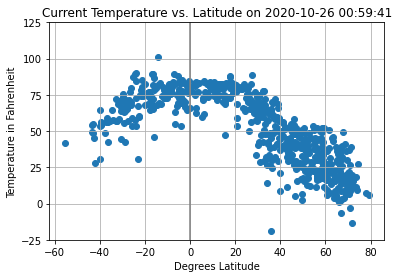

In [9]:
# Scatter plot with matplotlib.pyplot

plt.scatter(df["Latitude"], df["Current Temperature"])
plt.title("Current Temperature vs. Latitude on "+ date)
plt.xlabel("Degrees Latitude")
plt.ylabel("Temperature in Fahrenheit")
plt.yticks([-25, 0, 25, 50, 75, 100, 125])
plt.axvline(0, c="gray")
plt.grid()
plt.savefig("Figures/Scatter plot temp vs lat.png")
plt.show()

## %Humidity vs. Latitude
* Moving towards the equator, %humidity is low around the tropics (+/-23.5 degrees) and abrubtly increases at +/-10 degrees. There is also an interesting dense cluster of far northern cities (potentially Canada, northern Europe, or northern Asia) with extremely high humidity.

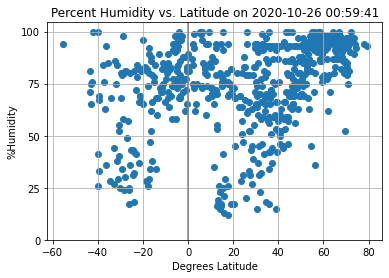

In [10]:
# Scatter plot with matplotlib.pyplot

plt.scatter(df["Latitude"], df["Humidity"])
plt.title("Percent Humidity vs. Latitude on "+ date)
plt.xlabel("Degrees Latitude")
plt.ylabel("%Humidity")
plt.yticks([0, 25, 50, 75, 100])
plt.axvline(0, c="gray")
plt.grid()
plt.savefig("Figures/Scatter plot %humidity vs lat.png")
plt.show()

## Cloudiness vs. Latitude
* If cloudiness were plotted on a histogram, this would be a markedly bimodal distribution with many cities having clear skies and many cities having complete cloud cover. +/-10 degrees from the equator there are very few cities with clear skies and quite a few cities with dense cloud cover.

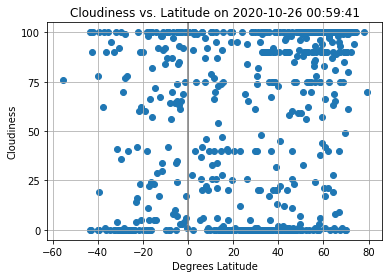

In [11]:
# Scatter plot with matplotlib.pyplot

plt.scatter(df["Latitude"], df["Cloudiness"])
plt.title("Cloudiness vs. Latitude on "+ date)
plt.xlabel("Degrees Latitude")
plt.ylabel("Cloudiness")
plt.yticks([0, 25, 50, 75, 100])
plt.axvline(0, c="gray")
plt.grid()
plt.savefig("Figures/Scatter plot cloudiness vs lat.png")
plt.show()

## Wind Speed Plot vs. Latitude
* As you move towards the equator, wind speed decreases, perhaps implying fewer storms.

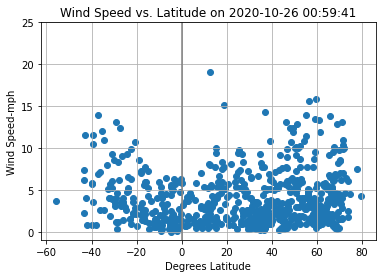

In [12]:
# Scatter plot with matplotlib.pyplot

plt.scatter(df["Latitude"], df["Wind Speed"])
plt.title("Wind Speed vs. Latitude on "+ date)
plt.xlabel("Degrees Latitude")
plt.ylabel("Wind Speed-mph")
plt.yticks([0, 5, 10, 15, 20, 25])
plt.axvline(0, c="gray")
plt.grid()
plt.savefig("Figures/Scatter plot wind speed vs lat.png")
plt.show()

## Linear Regression Analyses

In [13]:
# Select cities in northern hemisphere to use in the following analyses.
north_df = df.loc[df["Latitude"]>0]

# Select cities in southern hemisphere to use in the following analyses.
south_df = df.loc[df["Latitude"]<0]

####  Temperature vs. Latitude (Northern Hemisphere)
* The regression analysis confirms that proximity to the equator is a strong predictor of temperature and the results are highly statistically significant. 

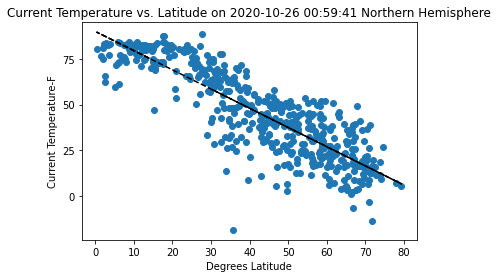

y=-1.1*x + 90.1
r=-0.86
p=0.0
standard error= 0.03


In [14]:
# Regression analysis with matplotlib.pyplot

plt.scatter(north_df["Latitude"], north_df["Current Temperature"])
plt.title("Current Temperature vs. Latitude on "+ date + " Northern Hemisphere")
plt.xlabel("Degrees Latitude")
plt.ylabel("Current Temperature-F")
plt.yticks([-25, 0, 25, 50, 75, 100, 125])
slope, y_int, r, p, std_err = sts.linregress(north_df["Latitude"], north_df["Current Temperature"])
predicted_temp = slope * north_df["Latitude"] + y_int
plt.plot(north_df["Latitude"], predicted_temp,"--", c="black")
plt.savefig("Figures/Regression analysis temp vs lat north.png")
plt.show()
print("y=" + str(round(slope, 1)) + "*x + " + str(round(y_int, 1)))
print("r=" + str(round(r, 2)))
print("p=" + str(round(p, 2)))
print("standard error= " + str(round(std_err, 2)))

####  Temperature vs. Latitude (Southern Hemisphere)
* The regression analysis confirms that proximity to the equator is a strong predictor of temperature and the results are highly statistically significant. Though the data points in the southern hemisphere aren't as tightly clustered as in the northern hemisphere.

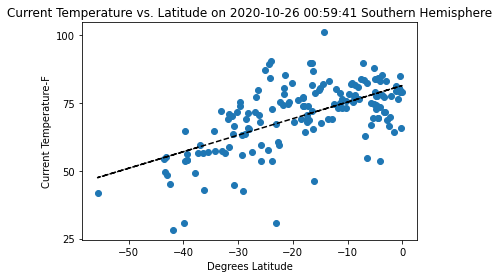

y=0.6*x + 81.4
r=0.61
p=0.0
standard error= 0.06


In [15]:
# Regression analysis with matplotlib.pyplot

plt.scatter(south_df["Latitude"], south_df["Current Temperature"])
plt.title("Current Temperature vs. Latitude on "+ date + " Southern Hemisphere")
plt.xlabel("Degrees Latitude")
plt.ylabel("Current Temperature-F")
plt.yticks([-25, 0, 25, 50, 75, 100, 125])
slope, y_int, r, p, std_err = sts.linregress(south_df["Latitude"], south_df["Current Temperature"])
predicted_temp = slope * south_df["Latitude"] + y_int
plt.plot(south_df["Latitude"], predicted_temp,"--", c="black")
plt.savefig("Figures/Regression analysis temp vs lat south.png")
plt.show()
print("y=" + str(round(slope, 1)) + "*x + " + str(round(y_int, 1)))
print("r=" + str(round(r, 2)))
print("p=" + str(round(p, 2)))
print("standard error= " + str(round(std_err, 2)))

####  %Humidity vs. Latitude (Northern Hemisphere)
* The regression analysis shows that the humidity vs. latitude trend is weaker than the temperature trend, but still there and still highly statistically significant.

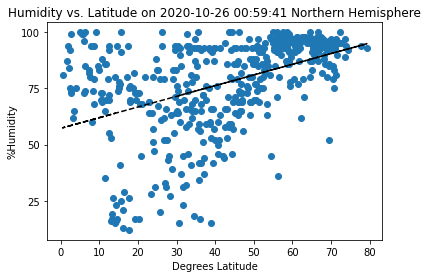

y=0.5*x + 57.2
r=0.45
p=0.0
standard error= 0.04


In [16]:
# Regression analysis with matplotlib.pyplot

plt.scatter(north_df["Latitude"], north_df["Humidity"])
plt.title("Humidity vs. Latitude on "+ date + " Northern Hemisphere")
plt.xlabel("Degrees Latitude")
plt.ylabel("%Humidity")
plt.yticks([-25, 0, 25, 50, 75, 100, 125])
slope, y_int, r, p, std_err = sts.linregress(north_df["Latitude"], north_df["Humidity"])
predicted_humidity = slope * north_df["Latitude"] + y_int
plt.plot(north_df["Latitude"], predicted_humidity,"--", c="black")
plt.savefig("Figures/Regression analysis %humidity vs lat north.png")
plt.show()
print("y=" + str(round(slope, 1)) + "*x + " + str(round(y_int, 1)))
print("r=" + str(round(r, 2)))
print("p=" + str(round(p, 2)))
print("standard error= " + str(round(std_err, 2)))

####  %Humidity vs. Latitude (Southern Hemisphere)
* The regression analysis for the southern hemisphere on the other hand shows a very weak correlation between humidity and latitude and the result is not statistically significant.

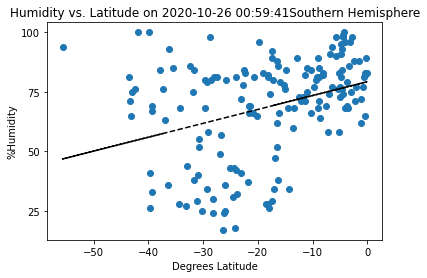

y=0.6*x + 79.2
r=0.34
p=0.0
standard error= 0.13


In [17]:
# Regression analysis with matplotlib.pyplot

plt.scatter(south_df["Latitude"], south_df["Humidity"])
plt.title("Humidity vs. Latitude on "+ date + "Southern Hemisphere")
plt.xlabel("Degrees Latitude")
plt.ylabel("%Humidity")
plt.yticks([-25, 0, 25, 50, 75, 100, 125])
slope, y_int, r, p, std_err = sts.linregress(south_df["Latitude"], south_df["Humidity"])
predicted_humidity = slope * south_df["Latitude"] + y_int
plt.plot(south_df["Latitude"], predicted_humidity,"--", c="black")
plt.savefig("Figures/Regression analysis %humidity vs lat south.png")
plt.show()
print("y=" + str(round(slope, 1)) + "*x + " + str(round(y_int, 1)))
print("r=" + str(round(r, 2)))
print("p=" + str(round(p, 2)))
print("standard error= " + str(round(std_err, 2)))

####  %Cloudiness vs. Latitude (Northern Hemisphere)
* In the northern hemisphere, the regression analysis shows that there is almost no increase in cloudiness as you move towards the equator and the result is not statistically significant and may have occurred by chance.

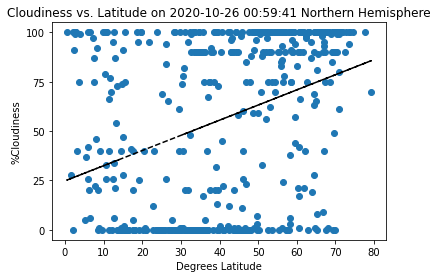

y=0.8*x + 24.8
r=0.35
p=0.0
standard error= 0.09


In [18]:
# Regression analysis with matplotlib.pyplot

plt.scatter(north_df["Latitude"], north_df["Cloudiness"])
plt.title("Cloudiness vs. Latitude on "+ date + " Northern Hemisphere")
plt.xlabel("Degrees Latitude")
plt.ylabel("%Cloudiness")
plt.yticks([-25, 0, 25, 50, 75, 100, 125])
slope, y_int, r, p, std_err = sts.linregress(north_df["Latitude"], north_df["Cloudiness"])
predicted_cloudiness = slope * north_df["Latitude"] + y_int
plt.plot(north_df["Latitude"], predicted_cloudiness,"--", c="black")
plt.savefig("Figures/Regression analysis %cloudiness vs lat north.png")
plt.show()
print("y=" + str(round(slope, 1)) + "*x + " + str(round(y_int, 1)))
print("r=" + str(round(r, 2)))
print("p=" + str(round(p, 2)))
print("standard error= " + str(round(std_err, 2)))

####  %Cloudiness vs. Latitude (Southern Hemisphere)
* In the southern hemisphere, the regression analysis shows that there is almost no increase in cloudiness as you move towards the equator and the result is not statistically significant and may have occurred by chance.

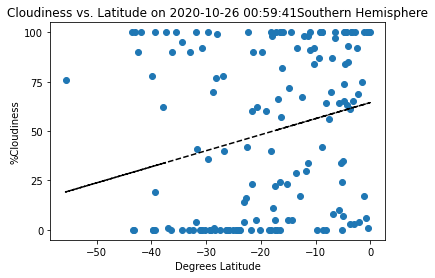

y=0.8*x + 64.4
r=0.24
p=0.0
standard error= 0.26


In [19]:
# Regression analysis with matplotlib.pyplot

plt.scatter(south_df["Latitude"], south_df["Cloudiness"])
plt.title("Cloudiness vs. Latitude on "+ date + "Southern Hemisphere")
plt.xlabel("Degrees Latitude")
plt.ylabel("%Cloudiness")
plt.yticks([-25, 0, 25, 50, 75, 100, 125])
slope, y_int, r, p, std_err = sts.linregress(south_df["Latitude"], south_df["Cloudiness"])
predicted_cloudiness = slope * south_df["Latitude"] + y_int
plt.plot(south_df["Latitude"], predicted_cloudiness,"--", c="black")
plt.savefig("Figures/Regression analysis %cloudiness vs lat south.png")
plt.show()
print("y=" + str(round(slope, 1)) + "*x + " + str(round(y_int, 1)))
print("r=" + str(round(r, 2)))
print("p=" + str(round(p, 2)))
print("standard error= " + str(round(std_err, 2)))

####   Wind Speed vs. Latitude (Northern Hemisphere)
* The regression results show that though there is almost no change in wind speed as you head north from the equator and that it is a statistically significant result.

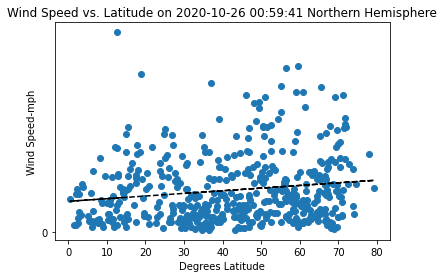

y=0.0*x + 3.0
r=0.16
p=0.0
standard error= 0.01


In [20]:
# Regression analysis with matplotlib.pyplot

plt.scatter(north_df["Latitude"], north_df["Wind Speed"])
plt.title("Wind Speed vs. Latitude on "+ date + " Northern Hemisphere")
plt.xlabel("Degrees Latitude")
plt.ylabel("Wind Speed-mph")
plt.yticks([0, 25, 50])
slope, y_int, r, p, std_err = sts.linregress(north_df["Latitude"], north_df["Wind Speed"])
predicted_wind_speed = slope * north_df["Latitude"] + y_int
plt.plot(north_df["Latitude"], predicted_wind_speed,"--", c="black")
plt.savefig("Figures/Regression analysis wind speed vs lat north.png")
plt.show()
print("y=" + str(round(slope, 1)) + "*x + " + str(round(y_int, 1)))
print("r=" + str(round(r, 2)))
print("p=" + str(round(p, 2)))
print("standard error= " + str(round(std_err, 2)))

####  Wind Speed vs. Latitude (Southern Hemisphere)
* On the other hand, as you move south away from the equator, the wind picks up slightly and it is a highly statistically significant result.

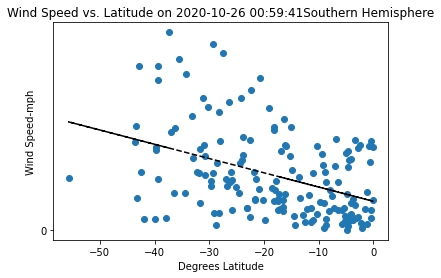

y=-0.1*x + 2.0
r=-0.41
p=0.0
standard error= 0.02


In [21]:
# Regression analysis with matplotlib.pyplot

plt.scatter(south_df["Latitude"], south_df["Wind Speed"])
plt.title("Wind Speed vs. Latitude on "+ date + "Southern Hemisphere")
plt.xlabel("Degrees Latitude")
plt.ylabel("Wind Speed-mph")
plt.yticks([-25, 0, 25, 50, 75, 100, 125])
slope, y_int, r, p, std_err = sts.linregress(south_df["Latitude"], south_df["Wind Speed"])
predicted_wind_speed = slope * south_df["Latitude"] + y_int
plt.plot(south_df["Latitude"], predicted_wind_speed,"--", c="black")
plt.savefig("Figures/Regression analysis wind speed vs lat south.png")
plt.show()
print("y=" + str(round(slope, 1)) + "*x + " + str(round(y_int, 1)))
print("r=" + str(round(r, 2)))
print("p=" + str(round(p, 2)))
print("standard error= " + str(round(std_err, 2)))